In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn 

###  Model training 

In [2]:
data_train = pd.read_csv('/Users/yeqinghua/Downloads/train.csv')
data_test = pd.read_csv('/Users/yeqinghua/Downloads/test.csv')
data_train.sample(n=6)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
147,148,60,RL,NaN,9505,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,222500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
1115,1116,20,RL,93.0,12085,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,11,2007,New,Partial,318000
1092,1093,50,RL,60.0,8400,Pave,NaN,Reg,Bnk,AllPub,...,0,NaN,NaN,NaN,0,6,2008,WD,Normal,136500
179,180,30,RM,60.0,8520,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2007,WD,Normal,100000
385,386,120,RL,43.0,3182,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,192000


In [4]:
dataset = data_train[['SalePrice', 'OverallQual', 'GrLivArea', 'BedroomAbvGr', 'GarageArea', 'LotShape', 'SaleCondition']]
y = dataset['SalePrice']
X = dataset.drop('SalePrice', axis=1)

In [5]:
dataset['LotShape'].value_counts()

Reg    925
IR1    484
IR2     41
IR3     10
Name: LotShape, dtype: int64

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .7)

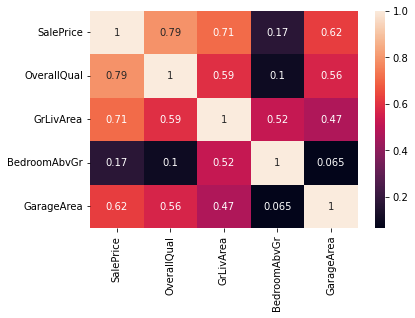

In [7]:
import seaborn as sns
_ = sns.heatmap(dataset.corr(), annot=True)

In [8]:
from sklearn.preprocessing import OrdinalEncoder

X_ord_encoded = X_train
ordinal_encoder = OrdinalEncoder()
ordinal_encoder.fit(X_ord_encoded[['SaleCondition']])
X_ord_encoded['SaleCondition'] = ordinal_encoder.transform(X_ord_encoded[['SaleCondition']])
X_ord_encoded.head(6)

,OverallQual,GrLivArea,BedroomAbvGr,GarageArea,LotShape,SaleCondition
1338,7,1861,3,492,IR1,4.0
1358,6,1573,3,440,Reg,4.0
176,6,2060,4,521,IR1,4.0
869,7,1949,3,574,Reg,4.0
120,6,988,1,540,IR1,4.0
1074,7,1240,2,826,Reg,4.0


In [19]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()
enc_df = pd.DataFrame(enc.fit_transform(X_train[['LotShape']]).toarray())
enc_df.head(6)

,0,1,2,3
0,1.0,0.0,0.0,0.0
1,0.0,0.0,0.0,1.0
2,1.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0
4,1.0,0.0,0.0,0.0
5,0.0,0.0,0.0,1.0


In [10]:
features_to_scale = [ 'OverallQual', 'GrLivArea', 'BedroomAbvGr', 'GarageArea']
X_train[features_to_scale].head(6)

,OverallQual,GrLivArea,BedroomAbvGr,GarageArea
1338,7,1861,3,492
1358,6,1573,3,440
176,6,2060,4,521
869,7,1949,3,574
120,6,988,1,540
1074,7,1240,2,826


In [11]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train.loc[:,features_to_scale] = scaler.fit_transform(X_train[features_to_scale])
X_test.loc[:,features_to_scale] = scaler.transform(X_test[features_to_scale])
X_train.head(6)

,OverallQual,GrLivArea,BedroomAbvGr,GarageArea,LotShape,SaleCondition
1338,0.655714,0.690245,0.201344,0.166370,IR1,4.0
1358,-0.082596,0.143706,0.201344,-0.080808,Reg,4.0
176,-0.082596,1.067889,1.479442,0.304219,IR1,4.0
869,0.655714,0.857243,0.201344,0.556151,Reg,4.0
120,-0.082596,-0.966452,-2.354852,0.394534,IR1,4.0
1074,0.655714,-0.488230,-1.076754,1.754013,Reg,4.0


### Model training

In [12]:
X1 = dataset['GrLivArea'].values.reshape(-1, 1)
y = dataset['SalePrice'].values.reshape(-1, 1)

In [13]:
from sklearn.model_selection import train_test_split
X1_train, X1_test, y_train, y_test = train_test_split(X1, y, test_size = .7)

In [14]:
from sklearn.linear_model import LinearRegression
regr = LinearRegression()
regr.fit(X1_train, y_train)

LinearRegression()

In [15]:
print('Coefficient: ', regr.coef_[0][0])
print('Intercept: ', regr.intercept_[0])

Coefficient:  110.3120466086979
Intercept:  13408.2319051862


### Model evaluation

In [16]:
y_pred = regr.predict(X1_test)

In [17]:
from sklearn.metrics import mean_squared_log_error

def compute_rmsle(y_test: np.ndarray, y_pred: np.ndarray, precision: int = 2) -> float:
    rmsle = np.sqrt(mean_squared_log_error(y_test, y_pred))
    return round(rmsle, precision)
compute_rmsle(y_test, y_pred)

0.28